In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
with open("../log_pid_2.txt", 'rb') as f:
    file=f.readlines()

contents=[line.decode().strip() for line in file]

In [10]:
pid_controller_1=[c for c in contents if c.startswith("PID")]
pid_controller_2=[c for c in contents if "path_0" in c]


pid_controller=[]

for x,y in zip(pid_controller_1, pid_controller_2):
    pid_controller.append(x+y)

print(len(pid_controller), len(pid_controller_2), len(pid_controller_1))
# print(pid_controller[0].replace("   ",""))

66 66 66


In [11]:
path_0=[]
for p in pid_controller:
    a=float(p.split(",")[7].split("path_0")[-1].replace("(",""))
    b=float(p.split(",")[8].replace(")",""))
    path_0.append(np.array((a,b)))

IndexError: list index out of range

In [ ]:
corr=[]
for p in pid_controller:
    corr.append(float(p.split(",")[6].split("corr")[-1]))

In [ ]:
err_ang=[]
for p in pid_controller:
    err_ang.append(float(p.split(",")[5].split("err_ang")[-1]))

In [ ]:
desired_dir=[]
for p in pid_controller:
    desired_dir.append(float(p.split(",")[4].split("desired_dir")[-1]))

In [ ]:
turn=[]
for p in pid_controller:
    turn.append(float(p.split(",")[3].split("turn")[-1]))

In [ ]:
robot_angle=[]
for p in pid_controller:
    error_angle=float(p.split(",")[1].split('robot_angle')[1])

    robot_angle.append((error_angle + np.pi) % (2 * np.pi) - np.pi)


In [ ]:
robot_pose=[]
for p in pid_controller:
    nums=p.split(",")[0].split("robot_pose")[-1][2:-1].split(' ')
    y=[]
    for x in nums:
        if x!='':
            y.append(float(x))
    robot_pose.append(np.array(y))


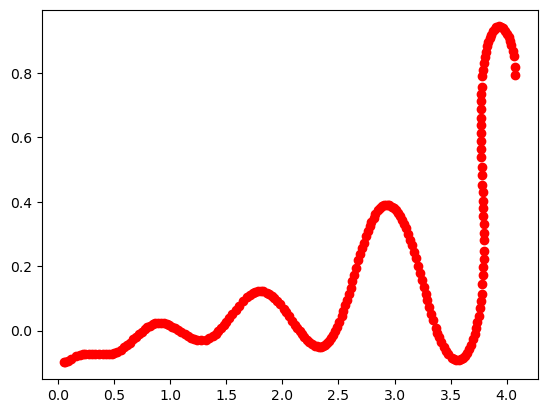

In [ ]:
for pose in robot_pose:
    plt.scatter(*pose, c='red')

In [ ]:
print(path_0[0])
print(robot_pose[0])
print(np.sqrt(np.sum((robot_pose[0]- path_0[0])**2)))

[-0.14925992 -0.12607834]
[ 0.05665051 -0.09872598]
0.20771917819935035


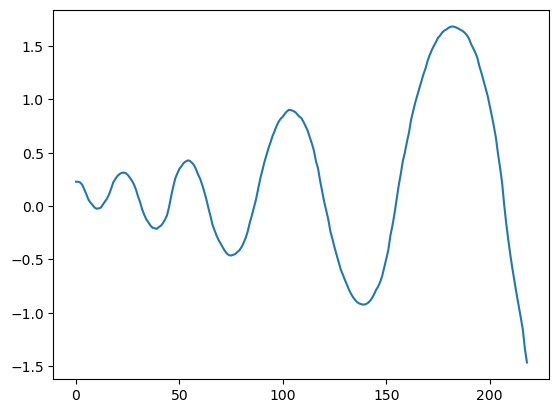

In [ ]:
plt.plot(robot_angle)

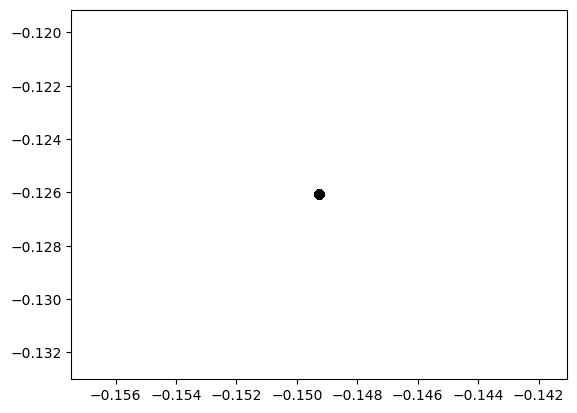

In [ ]:
for p in path_0:
    plt.scatter(*p, c='k')

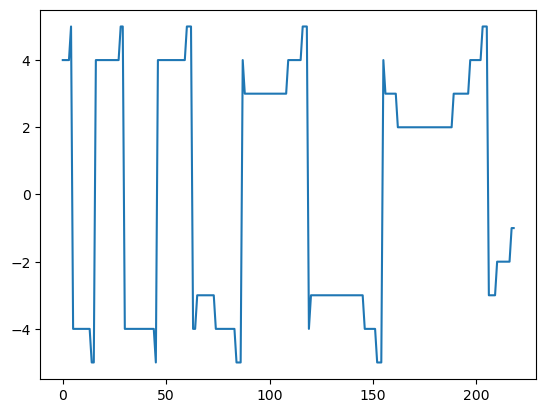

In [ ]:
plt.plot(corr)
plt.show()

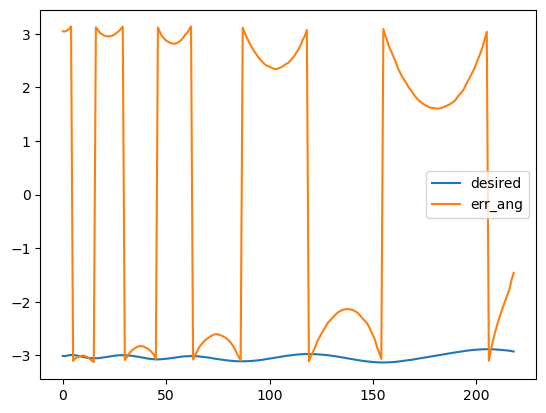

In [ ]:
plt.plot(desired_dir, label='desired')
plt.plot(err_ang, label='err_ang')
plt.legend()